# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [ ]:
df1 = pd.DataFrame(np.random.rand(5,3))

**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

The indicing starts from 0 all the way to the (number of entries - 1)

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [ ]:
df1.columns = ["Jan", "Feb", "Mar"]
df1.index = ["New York", "Los Angeles", "Chicago", "Houston", "Philadelphia"]

**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

I will just go to the seaborn repository and search for all the datasets

In [ ]:
datafunctions = [func for func in dir(sns) if 'data' in func]
print(datafunctions)

['get_data_home', 'get_dataset_names', 'load_dataset']


## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [ ]:
df_homes = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [ ]:
df_homes.to_csv("zillow_home_data.csv")

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [ ]:
df_homes_2 = pd.read_csv("zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [ ]:
df_homes_2.drop(columns=["Unnamed: 0"], inplace=True)

Due to error in index column definition while saving n reloading a csv file, an "unnamed: 0" column is created

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [ ]:
feb = pd.read_excel("https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx", sheet_name="February 2022", index_col=0)

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [ ]:
feb["Percentage Increase"] = (feb["This Month"] - feb["Last Month"]) / feb["Last Month"] * 100

## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [ ]:
df_penguins = sns.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [ ]:
df_penguins.info()
#or
df_penguins.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


(344, 7)

**13.** How might you show the first few rows of df_penguins?

In [ ]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [ ]:
df_penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**15.** What function can we use to drop the rows that have missing data?

In [ ]:
for idx in df_penguins[df_penguins.bill_length_mm.isna()].index:
  df_penguins.drop(idx,inplace=False)
# or
df_penguins.dropna(inplace=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

By default, it will **NOT** drop the rows from the original dataframe

**17.** How can we override the default?

By using the `inplace=True` or `inplace=False` argument inside `.drop()` function

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [ ]:
df_penguins_full = df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [ ]:
df_penguins_full.bill_length_mm.mean()

43.99279279279279

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.



>It is mostly correlated to flipper_length_mm



<Axes: >

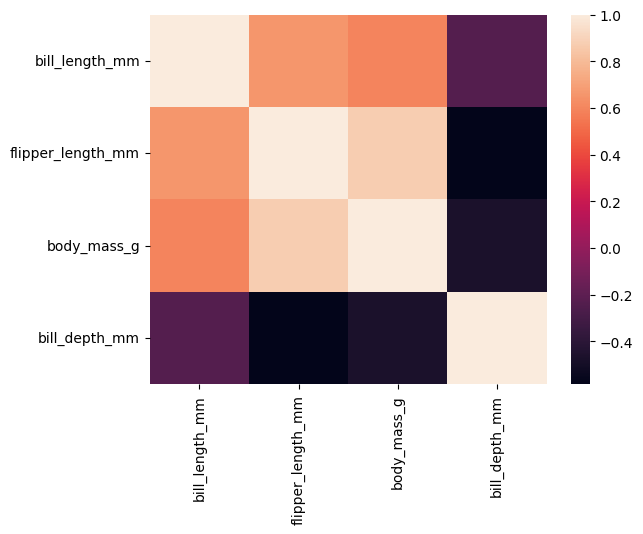

In [ ]:
corrmat = df_penguins[['bill_length_mm','flipper_length_mm', 'body_mass_g', 'bill_depth_mm']].corr()
#corrmat.style.background_gradient(cmap='coolwarm')
sns.heatmap(corrmat)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

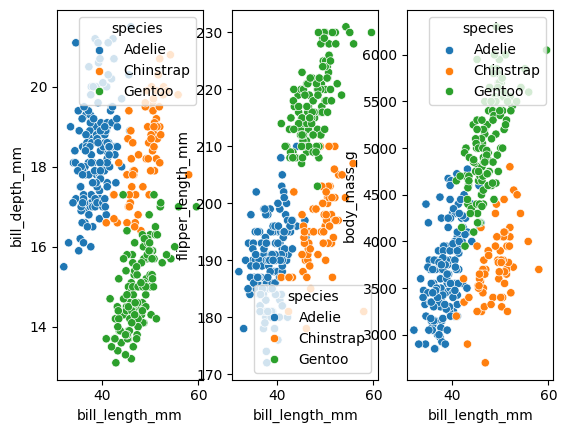

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins, hue='species')
plt.subplot(1,3,2)
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=df_penguins, hue='species')
plt.subplot(1,3,3)
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=df_penguins, hue='species')

**21.** How could you show the median flipper length, grouped by species?

In [ ]:
df_penguins.groupby("species").flipper_length_mm.median()

,flipper_length_mm
species,
Adelie,190.0
Chinstrap,196.0
Gentoo,216.0


**22.** Which species has the longest flippers?

Gentoo

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Adelie and chinstrap

In [ ]:
df_penguins.groupby("species").body_mass_g.mean()

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


**24.** How could you sort the rows by bill length?

In [ ]:
df_penguins.sort_values(by="bill_length_mm", inplace=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
...,...,...,...,...,...,...,...
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


**25.** How could you run the same sort in descending order?

In [ ]:
df_penguins.sort_values(by="bill_length_mm", inplace=False, ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


**26.** How could you sort by species first, then by body mass?

In [ ]:
df_penguins.sort_values(by=["species", "body_mass_g"], inplace=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [ ]:
df_diamonds = sns.load_dataset('diamonds')

**28.** Display the columns that are available.

In [ ]:
df_diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

depends on the data being stored in it

**30.** Select the 'table' column and show its type

In [ ]:
df_diamonds.table.dtype

dtype('float64')

**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [ ]:
subset = df_diamonds[['price', 'carat']].head(10)
subset

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31
5,336,0.24
6,336,0.24
7,337,0.26
8,337,0.22
9,338,0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [ ]:
df_diamonds.table.dtype

dtype('float64')

**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [ ]:
row = df_diamonds.iloc[0]
row

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
price,326
x,3.95
y,3.98
z,2.43


**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [ ]:
df_diamonds.loc[0].info()

<class 'pandas.core.series.Series'>
Index: 10 entries, carat to z
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [ ]:
df_diamonds.iloc[33]

,33
carat,0.23
cut,Very Good
color,E
clarity,VS1
depth,59.5
table,58.0
price,402
x,4.01
y,4.06
z,2.4


**36.** Select the row with the highest priced diamond.

In [ ]:
idx = df_diamonds[df_diamonds.price == df_diamonds.price.max()].index
df_diamonds.loc[idx]

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


**37.** Select the row with the lowest priced diamond.

In [ ]:
idxmin = df_diamonds[df_diamonds.price == df_diamonds.price.min()].index
df_diamonds.loc[idxmin]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [ ]:
df = sns.load_dataset('taxis')

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [ ]:
df['pickup_time']=pd.to_datetime(df.pickup)

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [ ]:
df_one_day = df[(df.pickup_time>='2019-03-23 00:06:00') & (df.pickup_time<'2019-03-24 00:00:00')]
df_one_day.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,2019-03-23 11:48:50
17,2019-03-23 20:50:49,2019-03-23 21:02:07,1,2.60,10.5,2.00,0.0,16.30,yellow,credit card,Midtown Center,East Harlem South,Manhattan,Manhattan,2019-03-23 20:50:49
117,2019-03-23 09:39:25,2019-03-23 09:56:45,0,3.60,15.5,3.75,0.0,22.55,yellow,credit card,Yorkville East,Penn Station/Madison Sq West,Manhattan,Manhattan,2019-03-23 09:39:25
144,2019-03-23 18:35:01,2019-03-23 18:47:39,1,3.20,12.5,2.00,0.0,17.80,yellow,credit card,UN/Turtle Bay South,East Village,Manhattan,Manhattan,2019-03-23 18:35:01


**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [ ]:

df_one_day['hour'] = df_one_day.pickup_time.dt.hour

for idx in df_one_day[df_one_day.hour.isna()].index:
  df_one_day.drop(idx,inplace=True)

# Filter the DataFrame to include only numeric columns
numeric_columns = df_one_day.select_dtypes(include=['number'])

numeric_columns.loc[:, 'hour'] = df_one_day['hour']

# Group by 'hour' and calculate means
df_means = numeric_columns.groupby('hour').mean()

# Display the result
df_means

<ipython-input-58-f827446ea561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_day['hour'] = df_one_day.pickup_time.dt.hour


,passengers,distance,fare,tip,tolls,total
hour,,,,,,
0,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000
1,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000
2,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091
3,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000
4,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000
5,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000
6,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333
7,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333
8,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000


**42.** Create a simple line plot of the value "distance".  

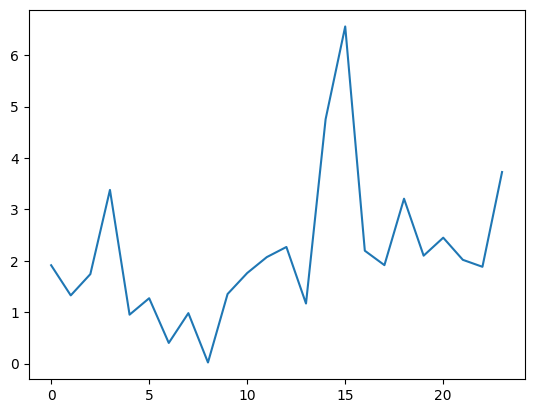

In [ ]:
plt.plot(df_means.distance)

**43.** Overall, do riders travel further or less far as the day progresses?

Farther

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [ ]:
df_means["tip_in_percent"] = df_means.tip / df_means.fare * 100

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

**46**. Display the correlations between the following pairs of values:
  1. tip_in_percent and distance.
  1. tip_in_percent and passengers.
  1. tip_in_percent and time_interval.

<Axes: >

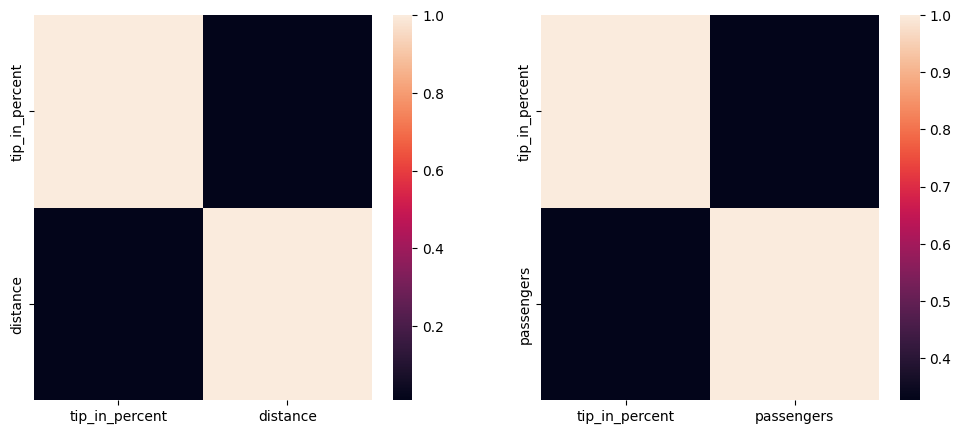

In [ ]:
corr1 = df_means[['tip_in_percent','distance']].corr()
corr2 = df_means[['tip_in_percent','passengers']].corr()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(corr1)
plt.subplot(1,2,2)
sns.heatmap(corr2)
# corr3 = df_means.tip_in_percent.corr(df_means.time_interval)


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?